# EDA and Prediction of Wine quality
dataset taken from: https://archive.ics.uci.edu/dataset/186/wine+quality <br><br>
Citation: Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009).<br> Wine Quality. UCI Machine Learning Repository.<br> https://doi.org/10.24432/C56S3T.

## Loading the dataset
There are two datasets, one for red wines and one for white wines

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

red = pd.read_csv("wine+quality/winequality-red.csv", delimiter=';')
white = pd.read_csv("wine+quality/winequality-white.csv", delimiter=';')

## Understanding the data

In [2]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.shape

(1599, 12)

In [5]:
white.shape

(4898, 12)

There are more than 3x data for white wines than red wines.

In [6]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
white.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [14]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

There are no null values in our datasets. <br>
All the values are continous values of int or float type. <br>
The features in the two datasets are the same.

## EDA

## Distribution of wines across wine quality

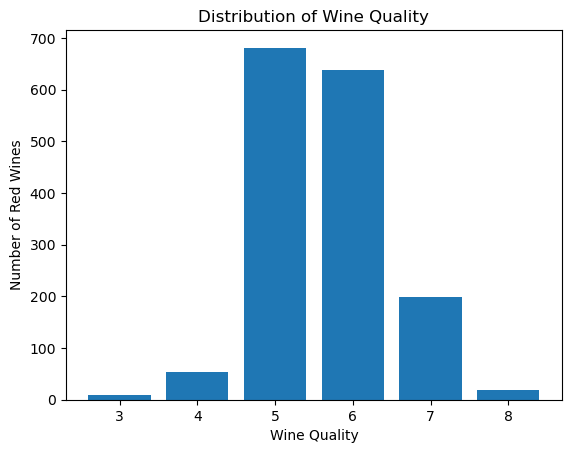

In [16]:
quality_counts = red['quality'].value_counts().sort_index()

plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Wine Quality')
plt.ylabel('Number of Red Wines')
plt.title('Distribution of Wine Quality')
plt.show()

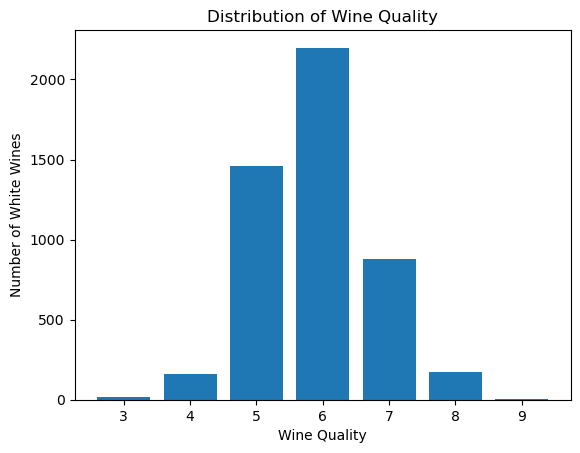

In [17]:
quality_counts = white['quality'].value_counts().sort_index()

plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Wine Quality')
plt.ylabel('Number of White Wines')
plt.title('Distribution of Wine Quality')
plt.show()

## Box plot of every feature vs quality

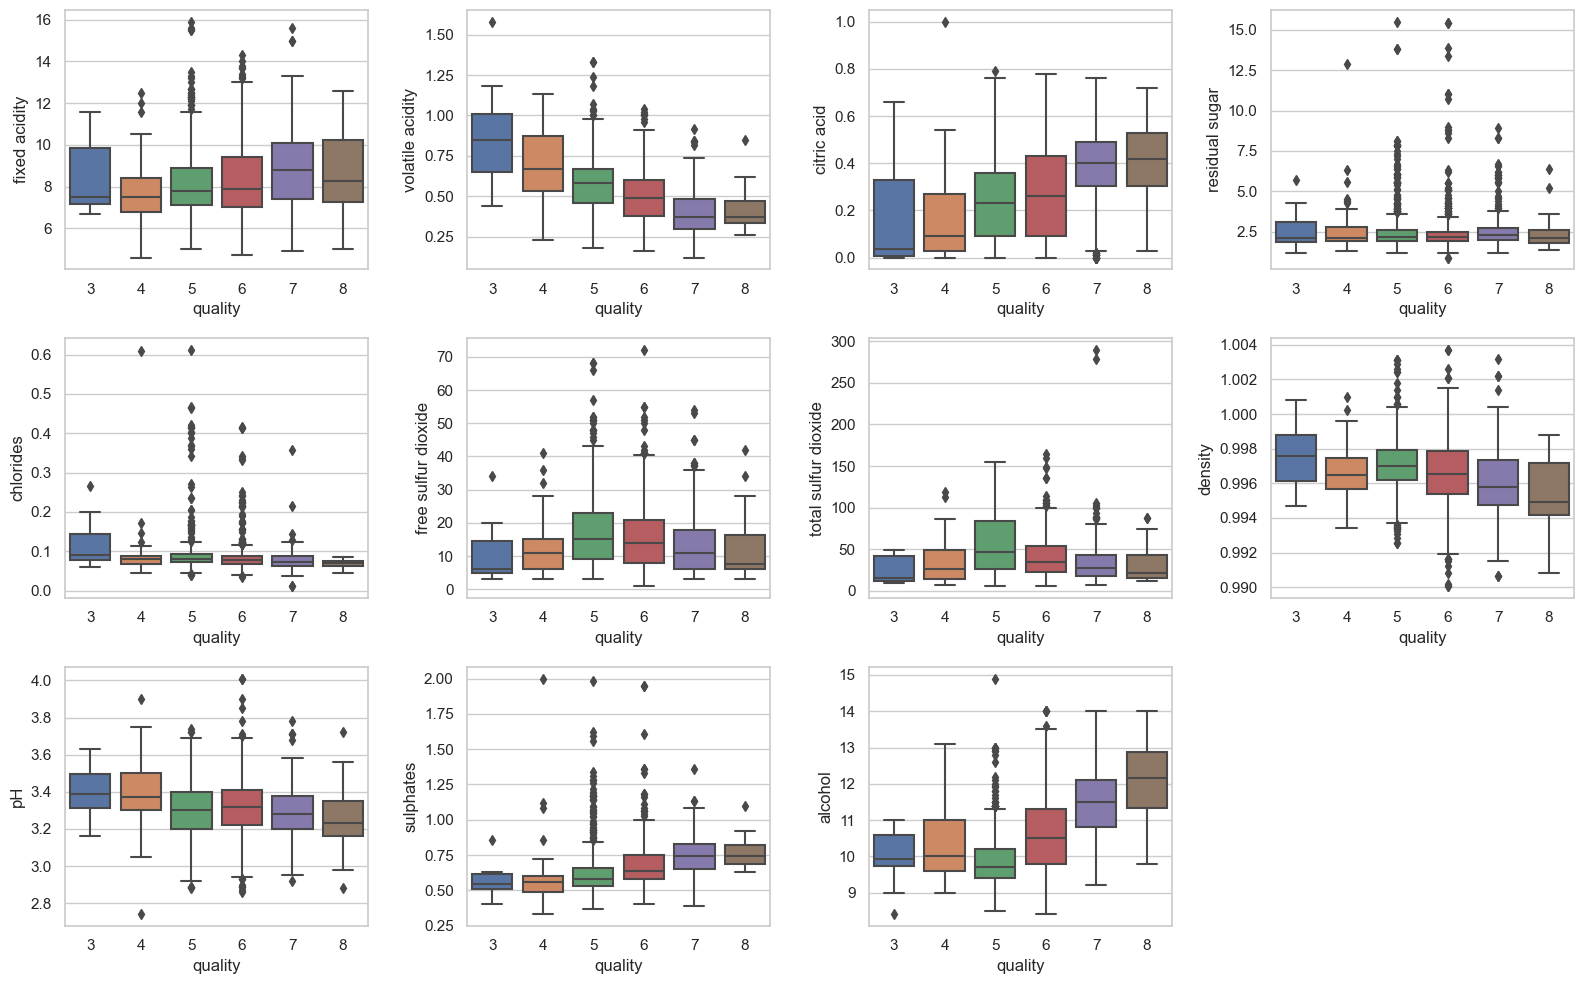

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

for column in red.columns[:-1]:
    plt.subplot(3, 4, red.columns.get_loc(column) + 1)
    sns.boxplot(x='quality', y=column, data=red)

plt.tight_layout()
plt.show()

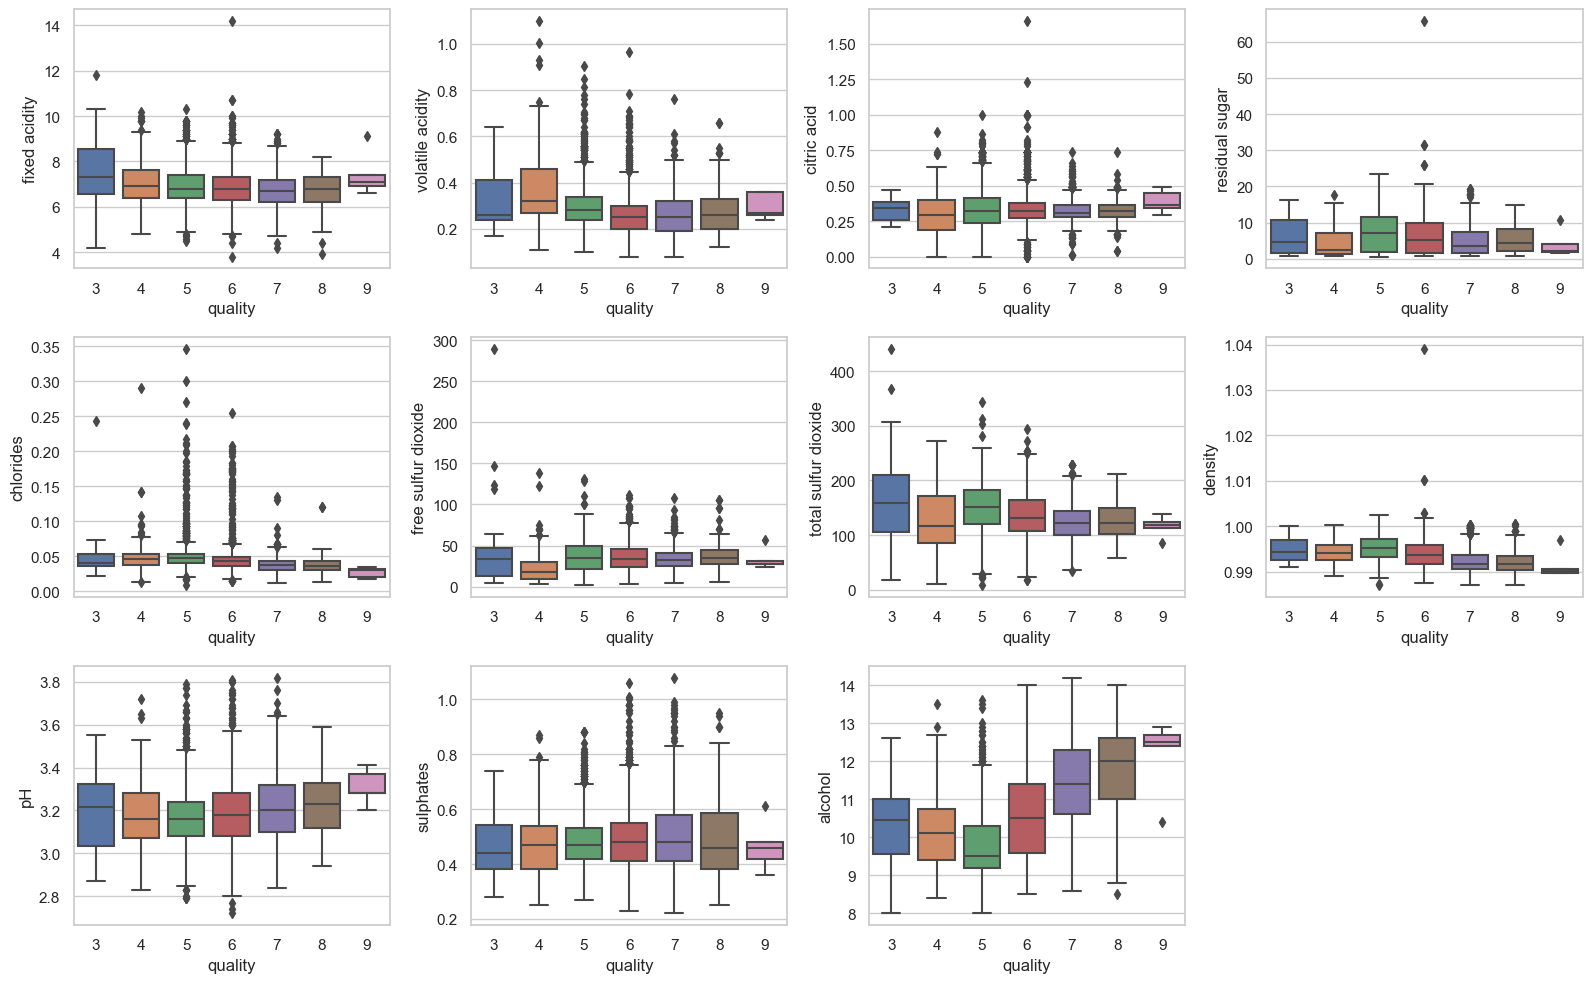

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

for column in white.columns[:-1]:
    plt.subplot(3, 4, white.columns.get_loc(column) + 1)
    sns.boxplot(x='quality', y=column, data=white)

plt.tight_layout()
plt.show()

## Heatmap for Red wine

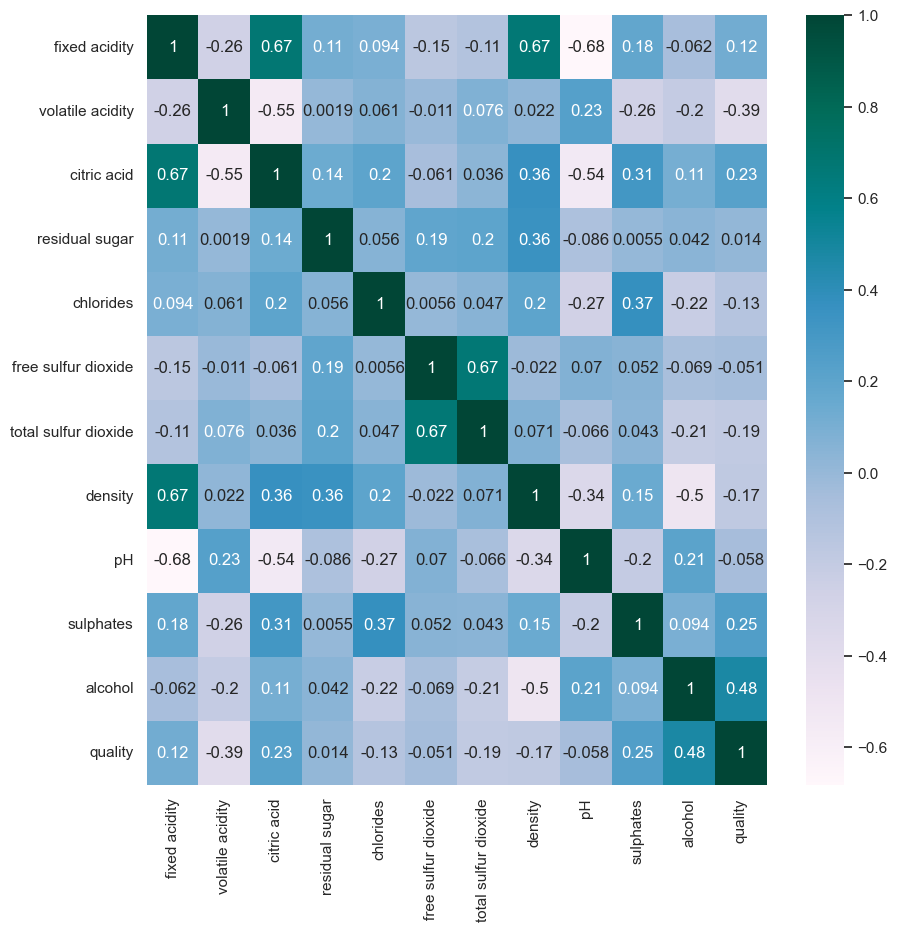

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(red.corr(),annot=True, cmap= 'PuBuGn');

## Heatmap for White wine

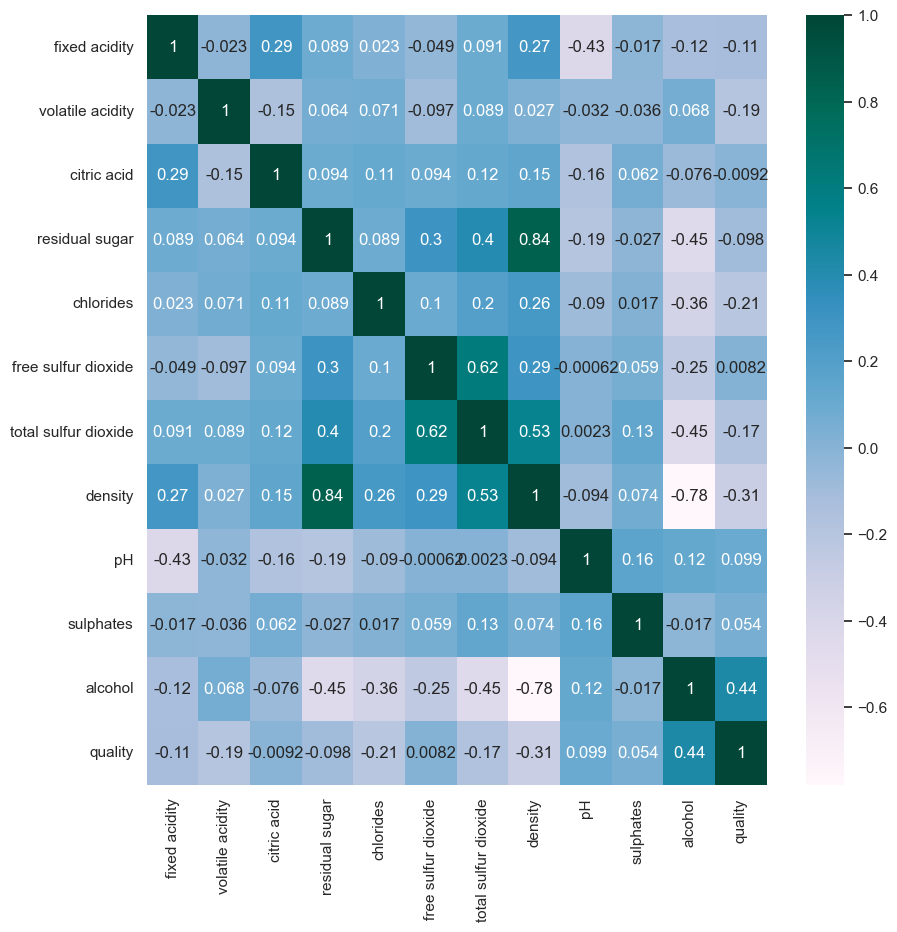

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(white.corr(),annot=True, cmap= 'PuBuGn');

In [22]:
red.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [23]:
white.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

We can see that alcohol contents has the most correlation agains wine quality, followed by density

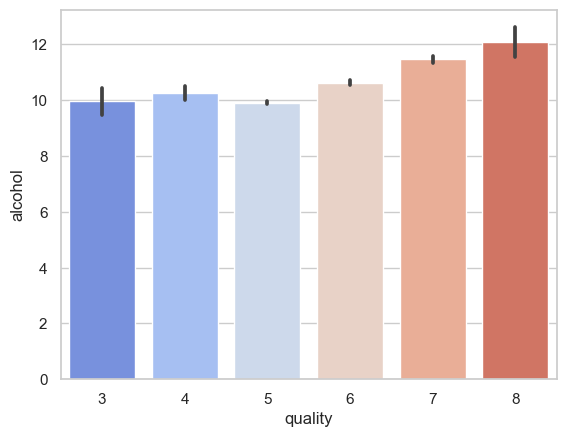

In [24]:
sns.barplot(x='quality', y = 'alcohol', data = red, palette = 'coolwarm');

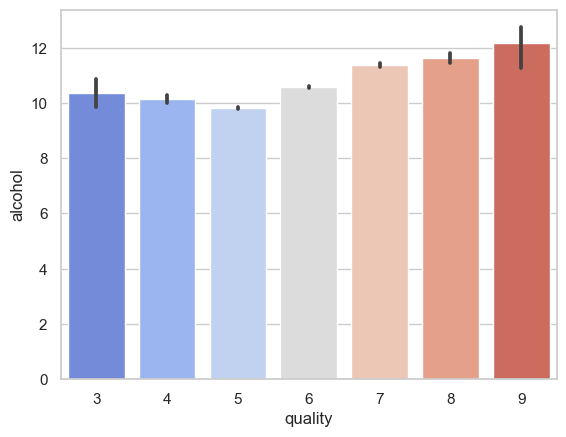

In [25]:
sns.barplot(x='quality', y = 'alcohol', data = white, palette = 'coolwarm');

## Predicting Wine quality

#### Since the features of our dataset are continuous values, and the predictions we want to make from these features are discrete values (i.e. integers ranging from 0-10), a Classification learning algorithm would best align with our goals
#### We chose KNN as our model

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [28]:
X = red.drop('quality', axis=1)
y = red['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.640625


#### We can look for the value of n_neighbors that will give us the best result

In [30]:
best_n = None
best_mae = float('inf')

for n_neighbors in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    if mae < best_mae:
        best_n = n_neighbors
        best_mae = mae

In [31]:
print(f"The best value for n_neighbors is {best_n}")

The best value for n_neighbors is 1


In [32]:
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.59375


### Let's try using the RandomForestClassifier as ensemble methods generally give us much better results

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.365625


Let's use the model on white wines

In [34]:
X = white.drop('quality', axis=1)
y = white['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.34591836734693876


### We can try combining the two datasets, taking care to label whether the wine in Red or White

In [35]:
red['color'] = 0

In [36]:
white['color'] = 1

In [37]:
full = pd.concat([red, white], axis=0)

In [38]:
X = full.drop('quality', axis=1)
y = full['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.3707692307692308


## Conclusions

We found that the alcohol content, followed by the density of the wine is most correlated to the wines quality.
Other factors do play a role, but not as much.

We also found that using a Random Forest Classifier gives us the better predictions, as compaired to using KNN.
These results can be greatly beneficial to businesses, both big and small.